In [1]:
# Lecture 17: Time Series
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from IPython.display import Image

In [36]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 1. Foundational concepts in Time Series

In [ ]:
# 2. An exploration of models and stationarity

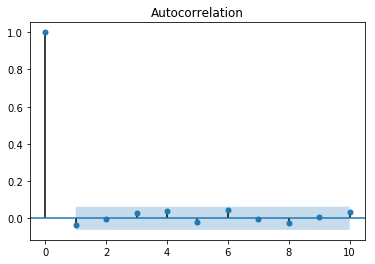

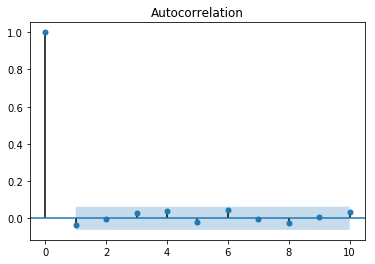

In [6]:
# Purely Random Process - no correlations
N = 1000
# sigma = 1
ts = np.random.randn(1000)
tsaplots.plot_acf(ts, lags=10)
#plt.close()

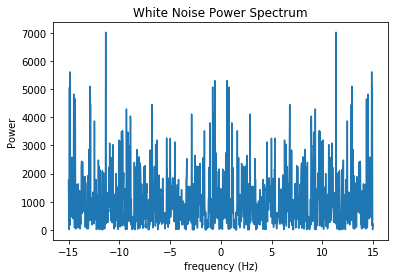

In [7]:
# Power spectrum 
def powspec(samps):
    ps = np.abs(np.fft.fft(samps))**2
    time_step = 1. / 30. #assume Hertz
    freqs = np.fft.fftfreq(samps.size, time_step)
    idx = np.argsort(freqs)
    return freqs[idx], ps[idx]

def plot_powspec(samps, title):
    f,p = powspec(ts)
    plt.plot(f,p)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Power")
    plt.title(title+ " Power Spectrum")
    
plot_powspec(ts, "White Noise")

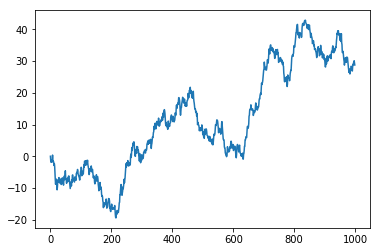

In [8]:
# Random Walk Model
N = 1000
z = np.random.randn(N)
x = np.zeros(N)
# start with x_0 = 0
for i in np.arange(1, N, 1):
    x[i] = x[i-1] + z[i]
plt.plot(x)

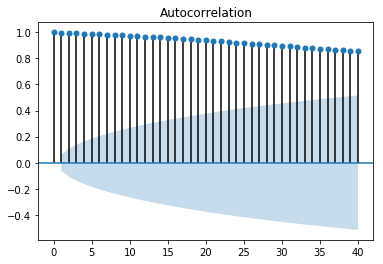

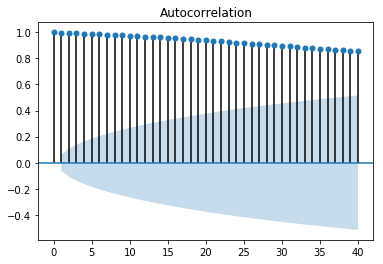

In [9]:
tsaplots.plot_acf(x, lags=40)

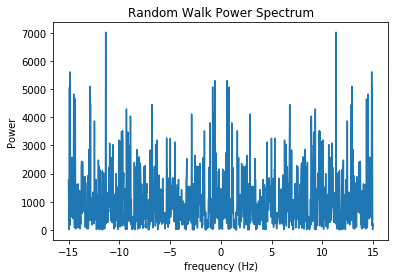

In [10]:
# power spec plot
plot_powspec(x, 'Random Walk')

In [11]:
# AR(1) model
def ts_gen_ar1(size, sigma, alpha1):
    e=sigma*np.random.randn(size)
    x=np.zeros(size)
    for i in np.arange(1,size,1):
        x[i] = alpha1*x[i-1] + e[i]
    return x

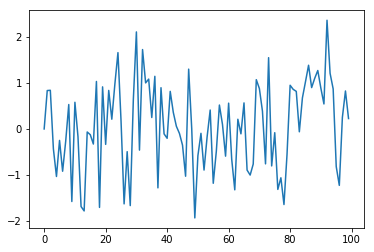

In [12]:
ts1 = ts_gen_ar1(100, 1., 0.3)
plt.plot(ts1)

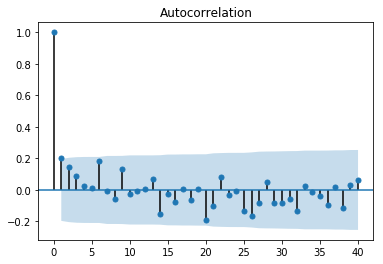

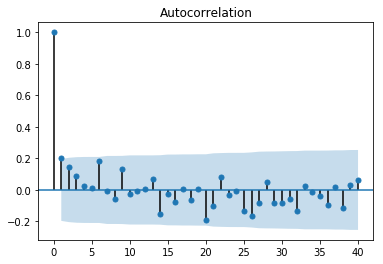

In [13]:
tsaplots.plot_acf(ts1, lags=40)

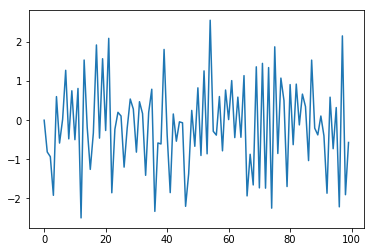

In [14]:
ts1b = ts_gen_ar1(100, 1., -0.3)
plt.plot(ts1b)

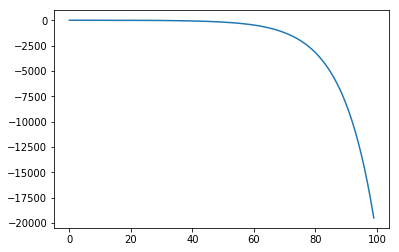

In [16]:
ts2 = ts_gen_ar1(100, 1., 1.1)
plt.plot(ts2)

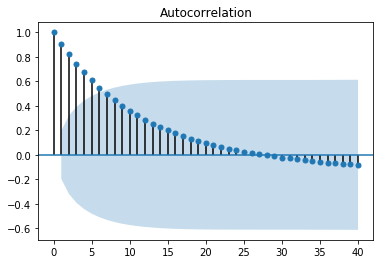

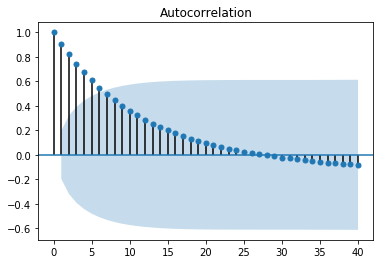

In [17]:
tsaplots.plot_acf(ts2, lags=40)

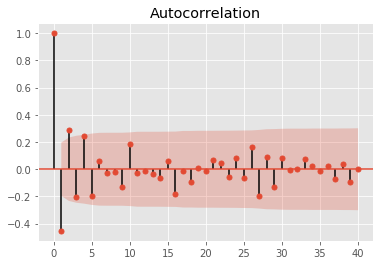

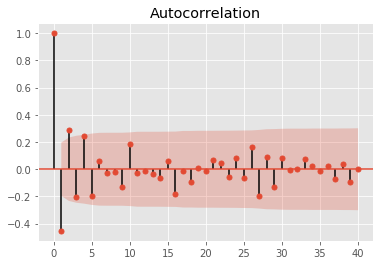

In [20]:
tsaplots.plot_acf(ts1b, lags=40)

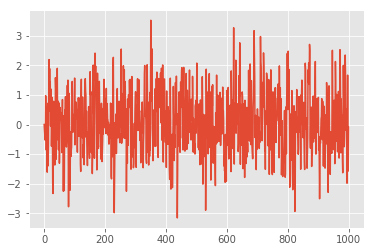

In [21]:
# MA(1) and MA(q) Models
N=1000
x=np.zeros(N)
z=np.random.randn(N)
beta1=0.5
for i in np.arange(1,N,1):
    x[i] = z[i] + beta1*z[i-1]
plt.plot(x)

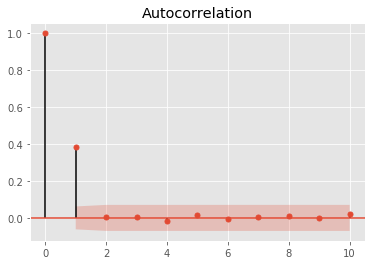

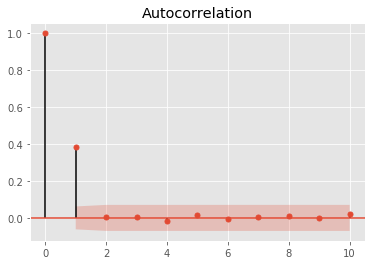

In [22]:
tsaplots.plot_acf(x, lags=10)

In [23]:
# The AR(2) Model
# AR(2): $x_t = 0.75x_{t-1} -0.125x_{t-2} + z_t$: STATIONARY, REAL ROOTS
from statsmodels.tsa.arima_process import arma_generate_sample
def gen_ar2(alpha1, alpha2, size):
    ar = [1, -alpha1, -alpha2]
    ma = [1.]
    return arma_generate_sample(ar, ma, size)

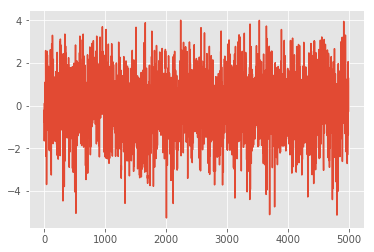

In [24]:
#roots 2 and 3
samps = gen_ar2(0.75, -0.125, 5000)
plt.plot(samps)

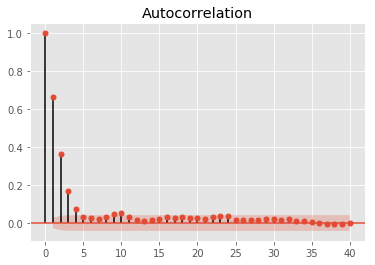

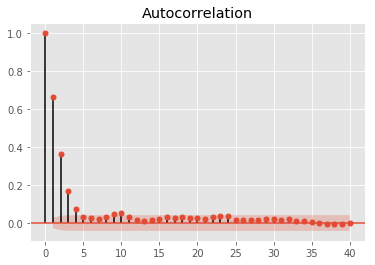

In [25]:
tsaplots.plot_acf(samps, lags=40)

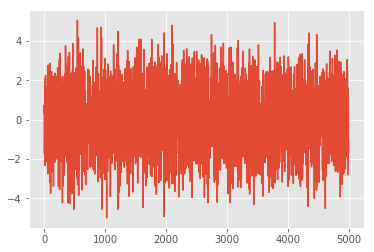

In [26]:
#roots 1 +/- i
samps = gen_ar2(1, -0.5, 5000)
plt.plot(samps)

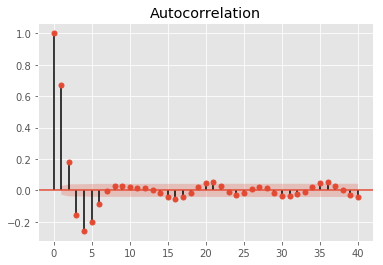

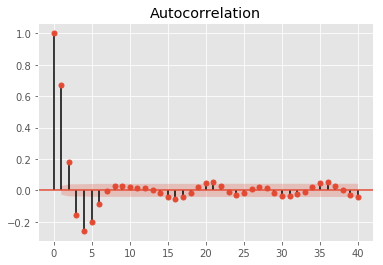

In [27]:
tsaplots.plot_acf(samps, lags=40)

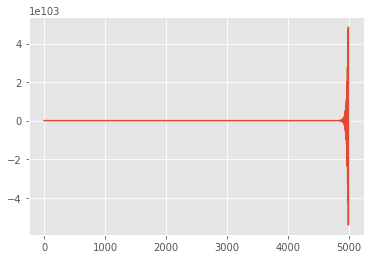

In [28]:
samps = gen_ar2(1, -1.1, 5000)
plt.plot(samps)

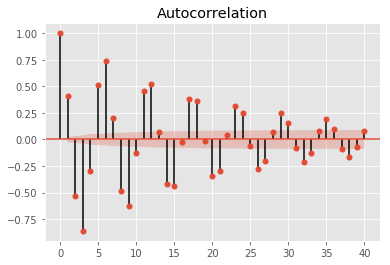

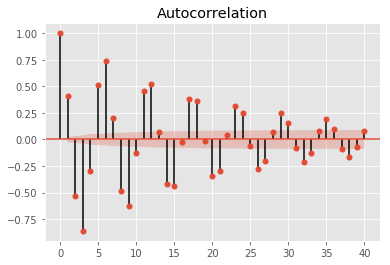

In [29]:
plt.close()
tsaplots.plot_acf(samps, lags=40)

In [30]:
# The partial autocorrelation function, or PACF

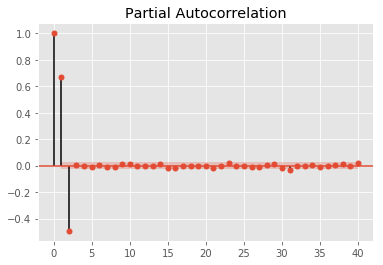

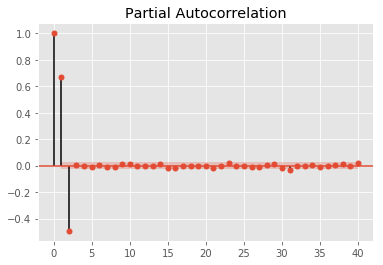

In [31]:
#Stationary AR(2)
tsaplots.plot_pacf(gen_ar2(1, -0.5, 5000), lags=40)

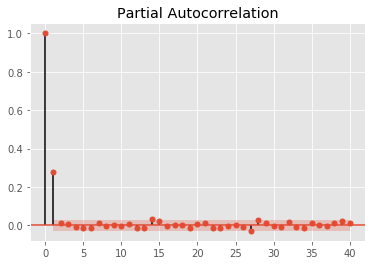

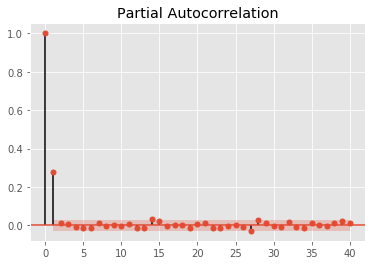

In [32]:
#Stationary AR(1)
tsaplots.plot_pacf(gen_ar2(0.3, 0, 5000), lags=40)

In [33]:
# 3. Other Models

In [34]:
# MA(q) and invertibility
def gen_ma2(beta1, beta2, size, sigma=1.0):
    ar = [1.]
    ma = [1., beta1, beta2]
    return arma_generate_sample(ar, ma, size, sigma=sigma)

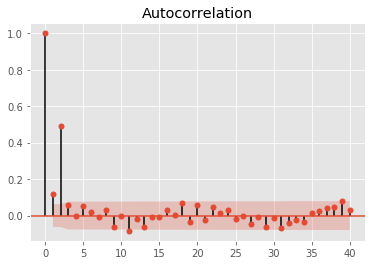

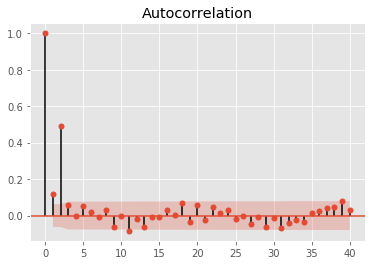

In [37]:
samps = gen_ma2(0.1,0.9,1000)
tsaplots.plot_acf(samps, lags=40)

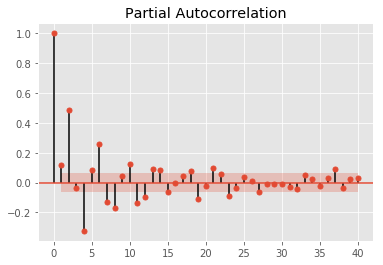

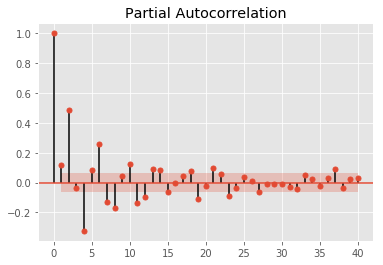

In [38]:
tsaplots.plot_pacf(samps, lags=40)

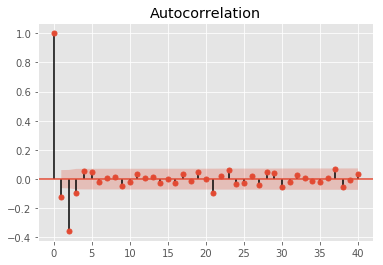

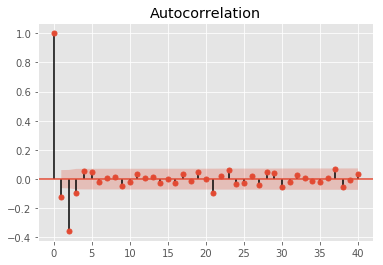

In [39]:
samps = gen_ma2(-0.5,-0.5,1000)
tsaplots.plot_acf(samps, lags=40)

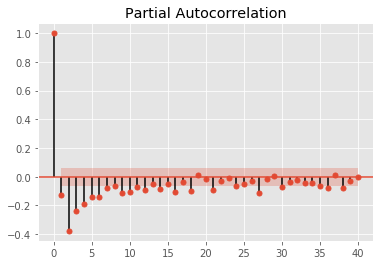

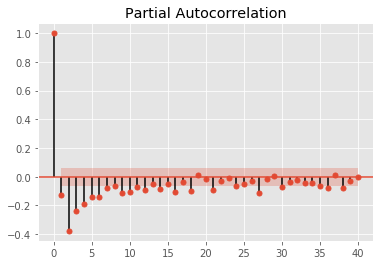

In [40]:
tsaplots.plot_pacf(samps, lags=40)

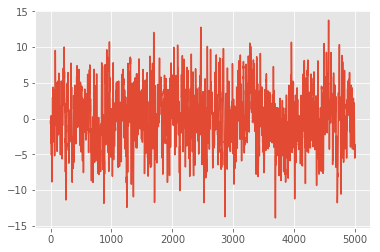

In [41]:
# ARMA(p,q) Model
ar=[1, -0.9, 0.08]
ma=[1, 0.5, 0.9]
samps=arma_generate_sample(ar, ma, 5000)
plt.plot(samps)

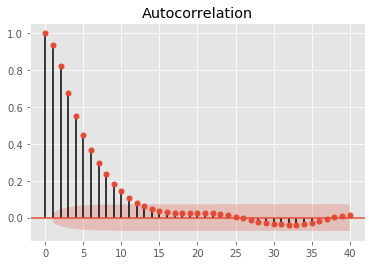

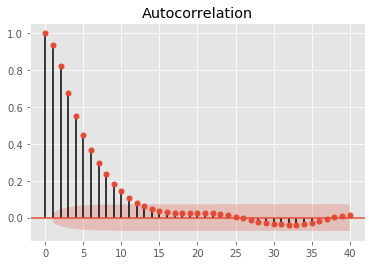

In [42]:
tsaplots.plot_acf(samps, lags=40)

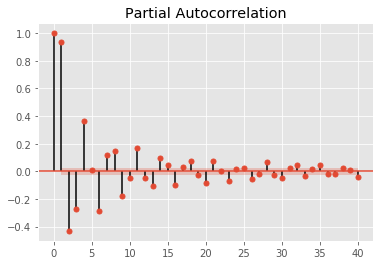

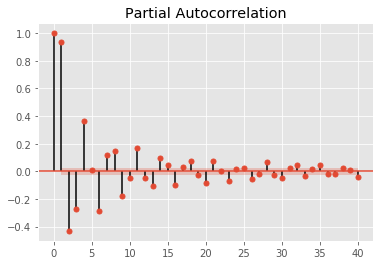

In [43]:
tsaplots.plot_pacf(samps, lags=40)

In [45]:
# ARIMA(p,d,q) Model

In [44]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html